<center><h1>E-commerce Sales Analysis</h1></center>

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading the Dataset

In [2]:
df = pd.read_csv("ecommerce_sales_analysis.csv")

## Data Exploration

In [3]:
df.head()     # first 5 instances of the dataset

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [4]:
df.tail()      # last 5 instances of the dataset

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,678,970,282,155,57,575,634,393
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,19,110,403,683,104,858,729,474
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,215,337,664,476,265,344,888,654
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,854,122,65,938,521,268,60,394
999,1000,Product_1000,Toys,225.77,2.1,114,890,903,983,769,134,704,648,400,495,839,611,110


In [5]:
df.shape

(1000, 18)

In [6]:
df.dtypes

product_id          int64
product_name       object
category           object
price             float64
review_score      float64
review_count        int64
sales_month_1       int64
sales_month_2       int64
sales_month_3       int64
sales_month_4       int64
sales_month_5       int64
sales_month_6       int64
sales_month_7       int64
sales_month_8       int64
sales_month_9       int64
sales_month_10      int64
sales_month_11      int64
sales_month_12      int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [8]:
df.isnull().sum()     # Checking for null values

product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64

In [9]:
df.duplicated().sum()      # Checking for any duplicates

0

In [10]:
df.describe().T            # summary statistics

,count,mean,std,min,25%,50%,75%,max
product_id,1000.0,500.50000,288.819436,1.00,250.75,500.50,750.250,1000.00
price,1000.0,247.67713,144.607983,7.29,121.81,250.92,373.435,499.86
review_score,1000.0,3.02760,1.171243,1.00,2.00,3.10,4.000,5.00
review_count,1000.0,526.50600,282.269932,1.00,283.75,543.00,772.000,999.00
sales_month_1,1000.0,498.30600,289.941478,0.00,245.50,507.50,740.750,1000.00
sales_month_2,1000.0,507.66100,285.992689,2.00,262.50,508.00,756.250,1000.00
sales_month_3,1000.0,506.73900,294.010873,0.00,243.75,493.00,777.250,999.00
sales_month_4,1000.0,503.82300,286.645567,0.00,261.50,501.50,749.500,1000.00
sales_month_5,1000.0,487.19400,287.844324,0.00,221.00,497.00,727.000,1000.00
sales_month_6,1000.0,491.65300,289.234018,0.00,236.00,479.50,740.500,1000.00


In [11]:
df.describe(include="object")

,product_name,category
count,1000,1000
unique,1000,7
top,Product_1,Books
freq,1,154


## Data Preparation

In [12]:
df['Total_sales'] = df.loc[:,"sales_month_1":"sales_month_12"].sum(axis=1)
df['Total_Revenue'] = df['price']*df['Total_sales']

In [13]:
df.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,Total_sales,Total_Revenue
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421,1222558.40
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027,2866441.20
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580,2049757.20
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022,1513329.48
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094,501109.62


In [14]:
all_categories_monthly_sales = df.groupby('category').sum().loc[:,"sales_month_1":"sales_month_12"]
all_categories_monthly_sales

,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
category,,,,,,,,,,,,
Books,77932,80079,76998,74699,79051,76644,79114,78108,77211,83504,76557,78332
Clothing,60966,67911,76796,70088,61643,63123,66105,74422,72675,68806,71683,72318
Electronics,76347,72472,70708,73158,72169,70060,72223,65754,69914,70148,68148,64019
Health,67644,67432,67602,72925,69178,63926,75256,69126,64581,72613,72500,71631
Home & Kitchen,57844,57252,62667,65388,59766,63169,60129,65042,58135,64876,66281,61592
Sports,77737,82244,75109,74287,73467,75641,77082,73912,79209,80187,74270,73226
Toys,79836,80271,76859,73278,71920,79090,77102,78205,70209,74664,76399,79268


In [15]:
month_sales = df.loc[:,"sales_month_1":"sales_month_12"].sum()
month_sales.sort_values(ascending=False)

sales_month_10    514798
sales_month_2     507661
sales_month_7     507011
sales_month_3     506739
sales_month_11    505838
sales_month_8     504569
sales_month_4     503823
sales_month_12    500386
sales_month_1     498306
sales_month_9     491934
sales_month_6     491653
sales_month_5     487194
dtype: int64

In [16]:
print('Total sales for all categories throughout the year is:', month_sales.sum(),'Product for sale')

Total sales for all categories throughout the year is: 6019912 Product for sale


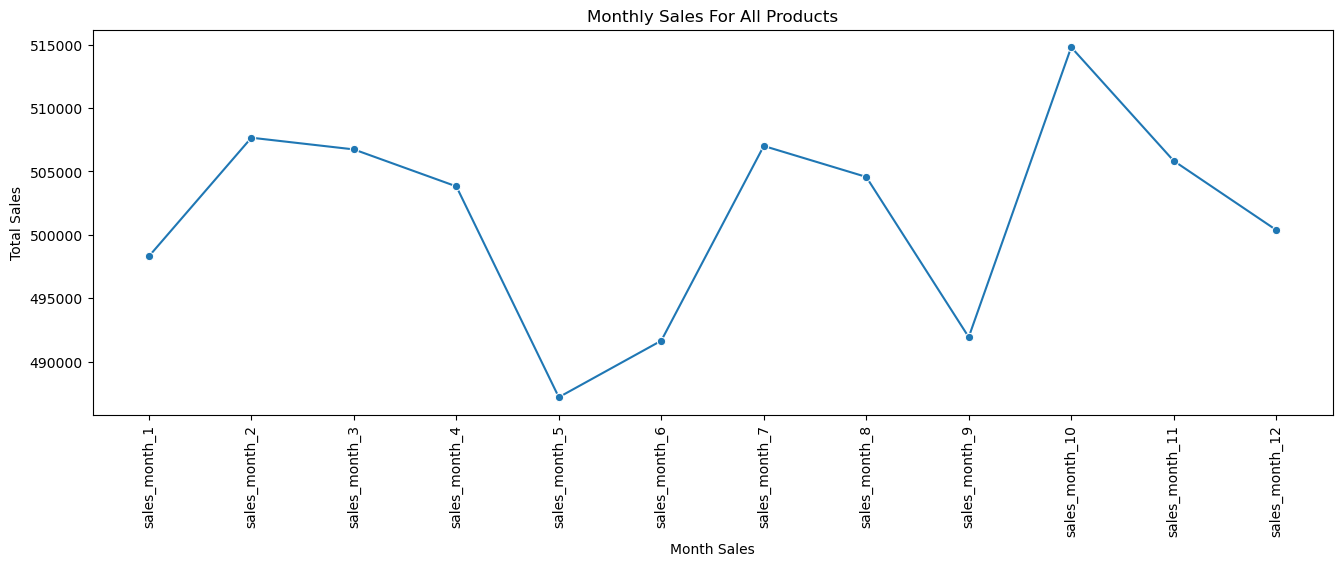

In [17]:
plt.figure(figsize=(16,5))
sns.lineplot(x = month_sales.index, y = month_sales,marker='o')
plt.xlabel('Month Sales')
plt.ylabel('Total Sales')
plt.title('Monthly Sales For All Products')
plt.xticks(rotation=90)
plt.show()

In [18]:
months=["month_1","month_2","month_3","month_4","month_5","month_6","month_7","month_8","month_9","month_10","month_11","month_12"] 

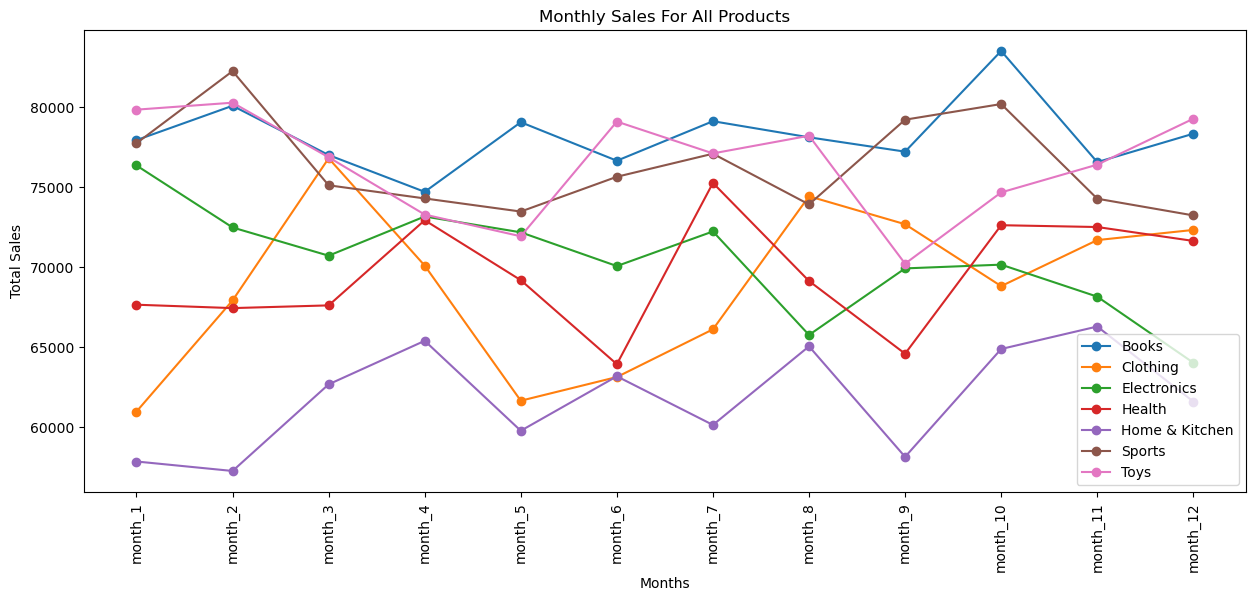

In [19]:
plt.figure(figsize=(15,6))

for category in all_categories_monthly_sales.index:
    plt.plot(months, all_categories_monthly_sales.loc[category], marker = 'o', label=category)

plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.title('Monthly Sales For All Products')
plt.xticks(rotation=90)
plt.legend()
plt.show() 

In [20]:
total_revenue = df.groupby('category')['Total_Revenue'].sum().sort_values(ascending=False)
total_revenue

category
Books             2.367828e+08
Sports            2.326488e+08
Toys              2.302372e+08
Health            2.217369e+08
Electronics       2.016747e+08
Clothing          1.872583e+08
Home & Kitchen    1.783655e+08
Name: Total_Revenue, dtype: float64

In [21]:
print('Total Revenue:',total_revenue.sum())

Total Revenue: 1488704183.02


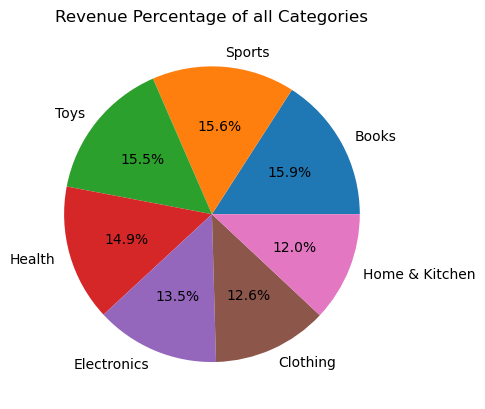

In [22]:
plt.pie(total_revenue, autopct = '%1.1f%%', labels=total_revenue.index)
plt.title("Revenue Percentage of all Categories")
plt.show()

C:\Users\rpatw\AppData\Local\Temp\ipykernel_69536\2370111674.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(total_revenue.index, rotation=90)


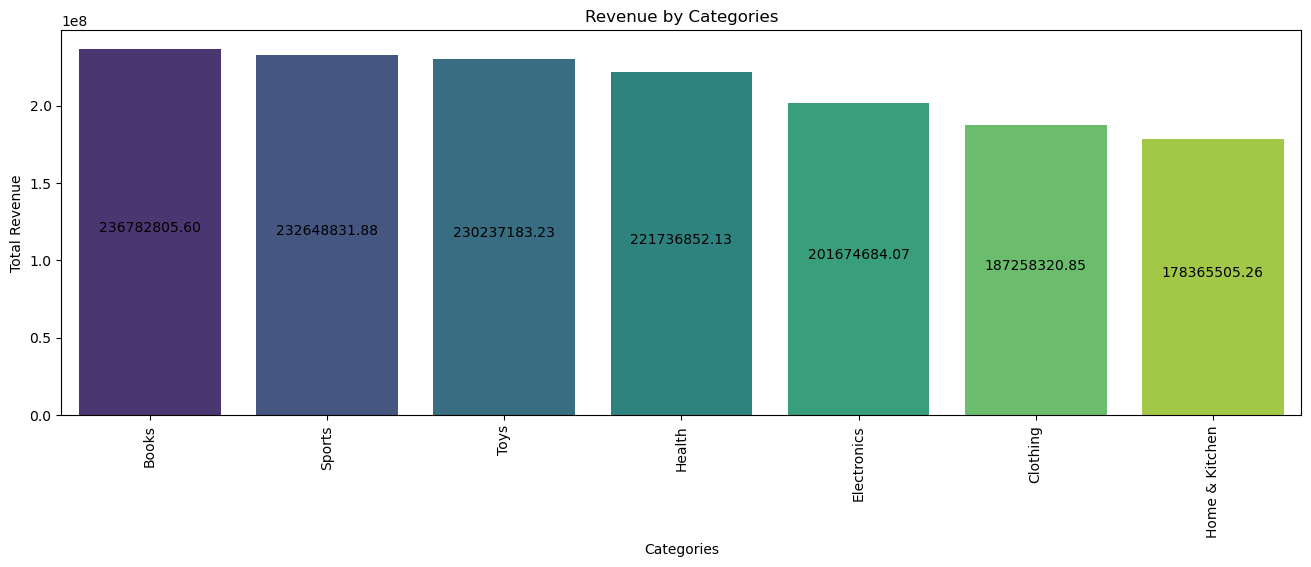

In [23]:
plt.figure(figsize=(16, 5))
ax = sns.barplot(
    x=total_revenue.index, 
    y=total_revenue, 
    palette="viridis"  
)

for i in range(len(total_revenue)):
    ax.text(i, total_revenue[i] / 2, f"{total_revenue[i]:.2f}", ha='center', color='black')

ax.set_ylabel("Total Revenue")
ax.set_xlabel("Categories")
ax.set_title("Revenue by Categories")
ax.set_xticklabels(total_revenue.index, rotation=90)

plt.show()


In [24]:
top_sales_by_category = df.groupby('category')['Total_sales'].sum().sort_values(ascending=False)
top_sales_by_category

category
Books             938229
Toys              917101
Sports            916371
Electronics       845120
Health            834414
Clothing          826536
Home & Kitchen    742141
Name: Total_sales, dtype: int64

In [25]:
print('Total Sales :',top_sales_by_category.sum())

Total Sales : 6019912


C:\Users\rpatw\AppData\Local\Temp\ipykernel_69536\359146213.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_sales_by_category.index, rotation=90)


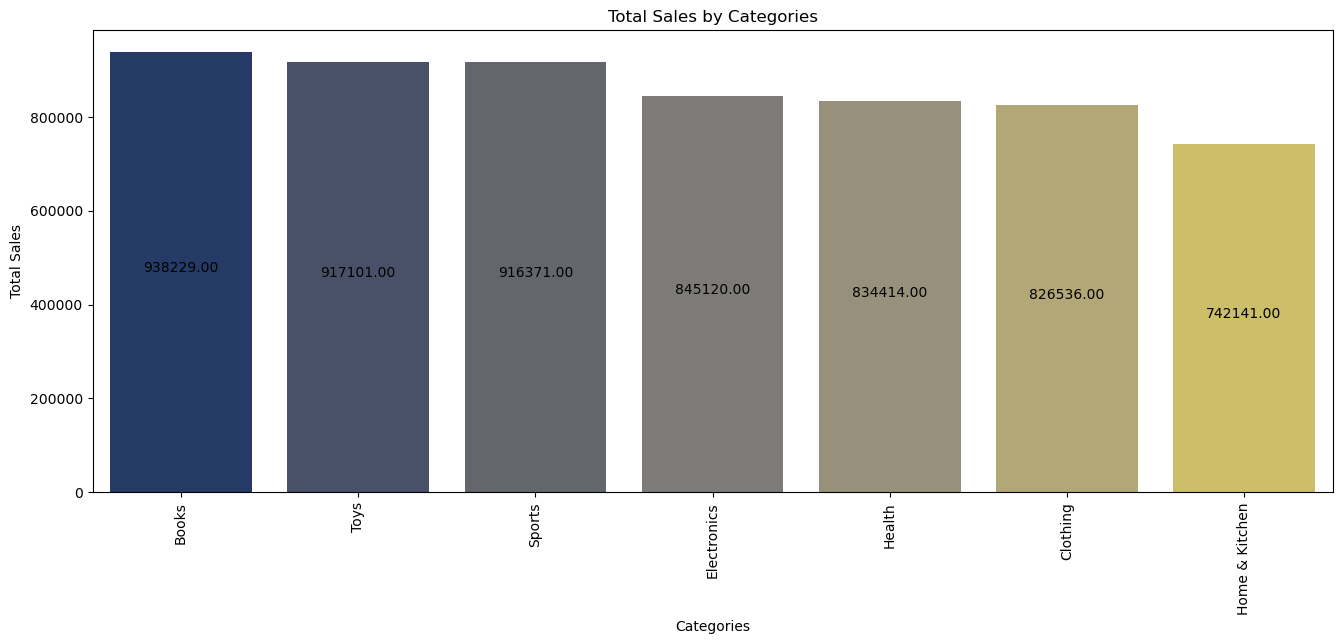

In [26]:
plt.figure(figsize=(16,6))
ax = sns.barplot(
    x=top_sales_by_category.index, 
    y=top_sales_by_category, 
    palette="cividis"  
)

for i in range(len(top_sales_by_category)):
    ax.text(i, top_sales_by_category[i] / 2, f"{top_sales_by_category[i]:.2f}", ha='center', color='black')

ax.set_ylabel("Total Sales")
ax.set_xlabel("Categories")
ax.set_title("Total Sales by Categories")
ax.set_xticklabels(top_sales_by_category.index, rotation=90)

plt.show()

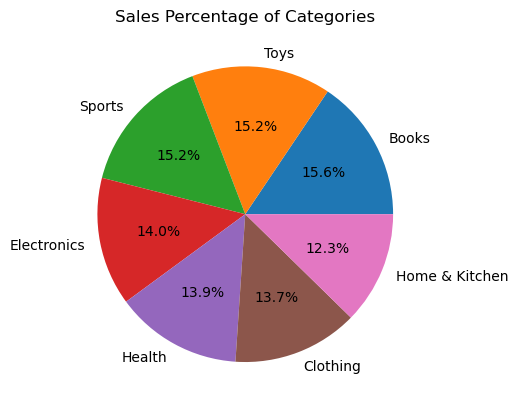

In [27]:
plt.pie(top_sales_by_category,autopct='%1.1f%%',labels=top_sales_by_category.index)
plt.title("Sales Percentage of Categories")
plt.show()

In [28]:
top_price=df.groupby('category')['price'].sum()
top_price.sort_values(ascending=False)

category
Sports            38895.09
Books             38713.26
Toys              37961.85
Health            36854.82
Electronics       33075.05
Clothing          32205.85
Home & Kitchen    29971.21
Name: price, dtype: float64

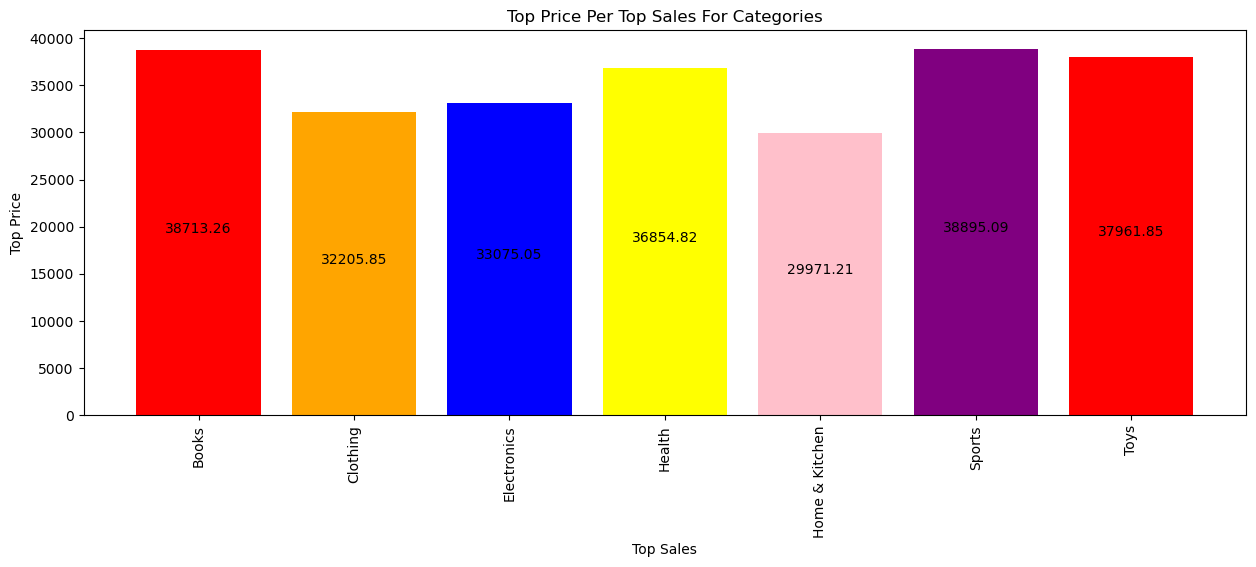

In [30]:
colors = ['red','orange','blue','yellow','pink','purple']
plt.figure(figsize=(15, 5))
plt.bar(top_price.index,top_price,color=colors)
for i in range(len(top_price)):
    plt.text(i , top_price[i]//2,top_price[i], ha ='center')
plt.title('Top Price Per Top Sales For Categories')
plt.xlabel('Top Sales')
plt.ylabel('Top Price')
plt.xticks(rotation=90)
plt.show()


In [31]:
total_review=df.groupby('category')['review_count'].sum().sort_values(ascending=False)
total_review

category
Sports            83726
Books             79263
Toys              79175
Electronics       73862
Health            72398
Clothing          70347
Home & Kitchen    67735
Name: review_count, dtype: int64

In [32]:
print('Total Category Review Count:',total_review.sum())

Total Category Review Count: 526506


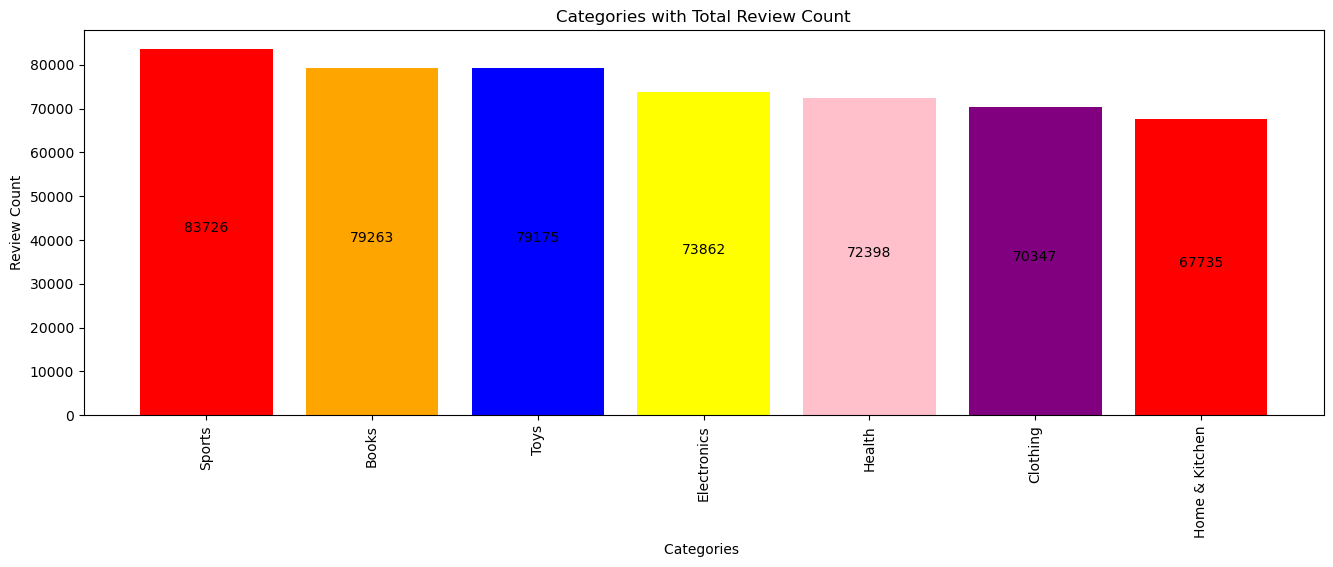

In [34]:
plt.figure(figsize=(16, 5))
plt.bar(total_review.index,total_review,color=colors)
for i in range(len(total_review)):
    plt.text(i , total_review[i]//2,total_review[i], ha ='center')
plt.xlabel('Categories ')
plt.ylabel('Review Count')
plt.title('Categories with Total Review Count')
plt.xticks(rotation=90)
plt.show()

In [37]:
category_counts=df['category'].value_counts()
category_counts

category
Books             154
Sports            153
Toys              151
Clothing          140
Health            139
Electronics       138
Home & Kitchen    125
Name: count, dtype: int64

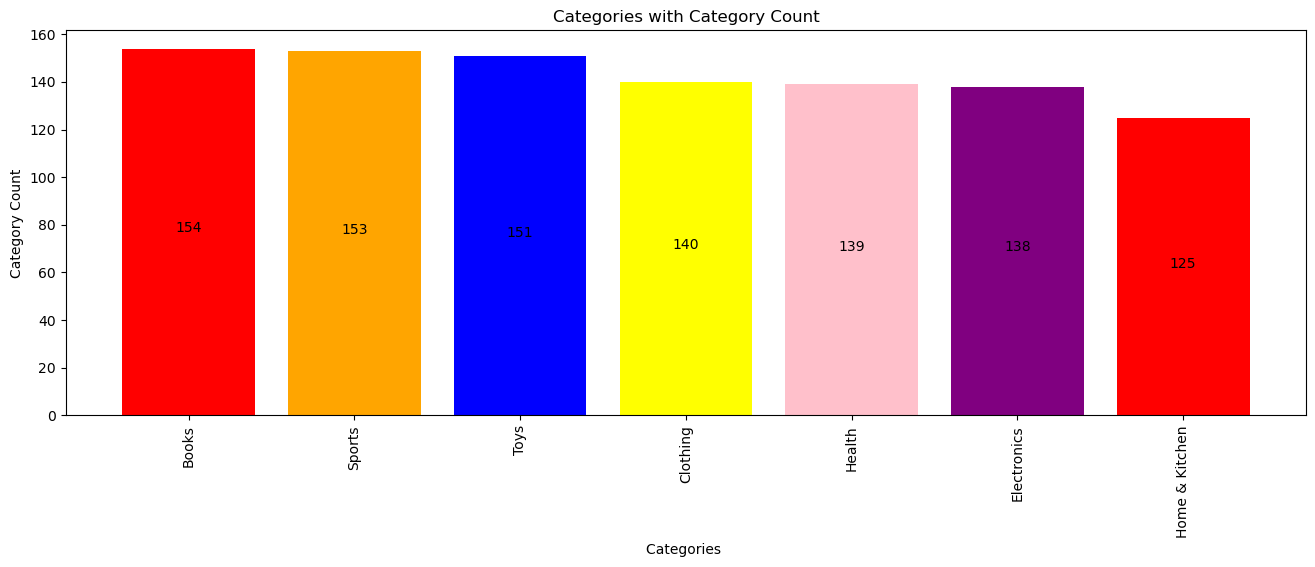

In [39]:
plt.figure(figsize=(16, 5))
plt.bar(category_counts.index,category_counts,color=colors)

for i in range(len(category_counts)):
    plt.text(i , category_counts[i]//2,category_counts[i], ha ='center')
    
plt.xlabel('Categories ')
plt.ylabel('Category Count')
plt.title('Categories with Category Count')
plt.xticks(rotation=90)
plt.show()

In [40]:
review_perc=(total_review.sum()/top_sales_by_category.sum())*100
non_review_perc=100-review_perc
print('Review percentage of total sales:',review_perc)
print('Non Review percentage of total sales:',non_review_perc)

Review percentage of total sales: 8.74607469345067
Non Review percentage of total sales: 91.25392530654933


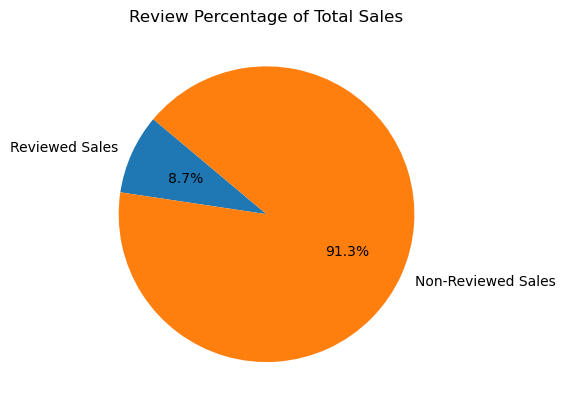

In [41]:
percentages = [review_perc, non_review_perc]
labels = ['Reviewed Sales', 'Non-Reviewed Sales']
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Review Percentage of Total Sales')
plt.show()

## Analysis based on Top 10 products

#### Top 10 highest Revenue generating products

In [42]:
top_10_products = df.sort_values(by="Total_Revenue", ascending = False).head(10).reset_index(drop=True)
top_10_products

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,Total_sales,Total_Revenue
0,306,Product_306,Books,488.05,4.5,943,539,963,932,809,502,335,433,402,616,981,674,625,7811,3812158.55
1,532,Product_532,Books,499.86,3.4,162,667,48,734,711,658,950,989,438,588,615,829,303,7530,3763945.80
2,53,Product_53,Sports,470.05,4.8,313,193,97,734,961,798,842,765,913,953,746,885,33,7920,3722796.00
3,229,Product_229,Electronics,446.56,4.9,758,905,720,607,789,849,949,270,745,722,72,756,898,8282,3698409.92
4,391,Product_391,Books,495.30,1.9,507,527,234,510,1000,918,948,681,784,656,177,444,491,7370,3650361.00
5,523,Product_523,Toys,485.11,2.4,772,619,715,959,382,846,997,596,873,22,471,501,370,7351,3566043.61
6,141,Product_141,Books,481.41,4.3,376,159,799,236,453,537,667,816,559,791,579,888,890,7374,3549917.34
7,113,Product_113,Clothing,465.20,1.9,435,564,946,876,922,731,719,364,228,838,695,156,528,7567,3520168.40
8,752,Product_752,Health,470.22,1.9,118,247,858,503,849,928,518,392,378,32,955,873,951,7484,3519126.48
9,476,Product_476,Toys,496.52,3.7,325,558,628,738,978,439,803,30,920,177,643,591,576,7081,3515858.12


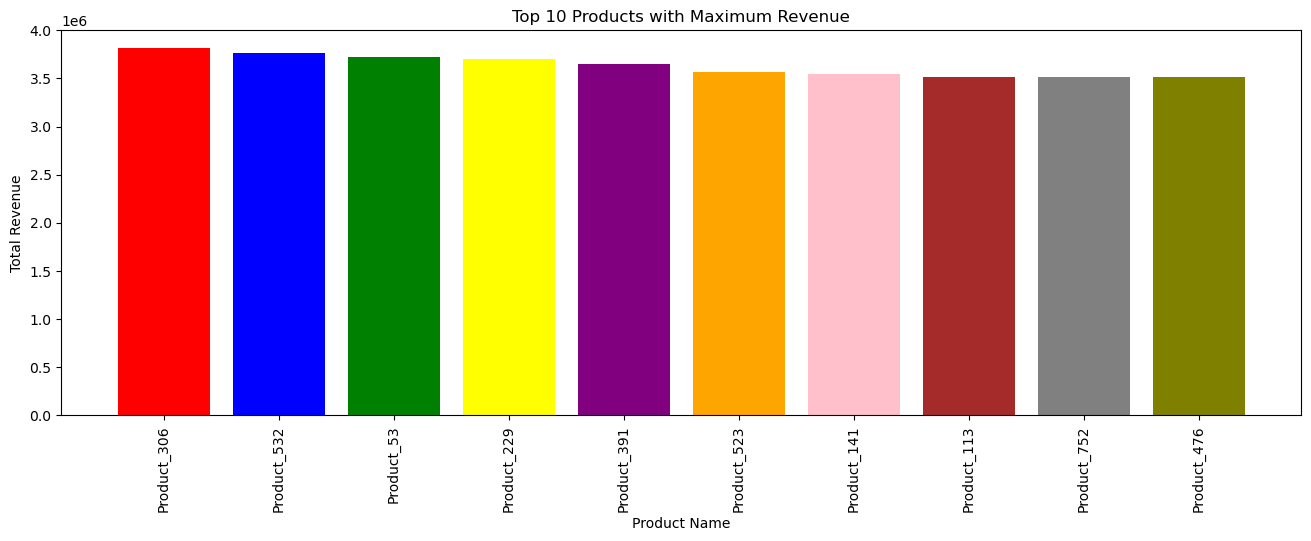

In [43]:
palette = ['red','blue','green','yellow','purple','orange','pink','brown','gray','olive']
plt.figure(figsize=(16, 5))
plt.bar(top_10_products['product_name'],top_10_products['Total_Revenue'],color = palette)
plt.ylabel('Total Revenue')
plt.xlabel('Product Name')
plt.title('Top 10 Products with Maximum Revenue')
plt.xticks(rotation=90)
plt.show()

#### The most revenue generating categories in the Top 10 products

In [44]:
most_revenue_generating_categories_in_top_10_products = top_10_products.groupby("category")['Total_Revenue'].sum().sort_values(ascending=False)
most_revenue_generating_categories_in_top_10_products

category
Books          14776382.69
Toys            7081901.73
Sports          3722796.00
Electronics     3698409.92
Clothing        3520168.40
Health          3519126.48
Name: Total_Revenue, dtype: float64

In [45]:
print('Total Revenue For Top 10 product',most_revenue_generating_categories_in_top_10_products.sum())

Total Revenue For Top 10 product 36318785.22


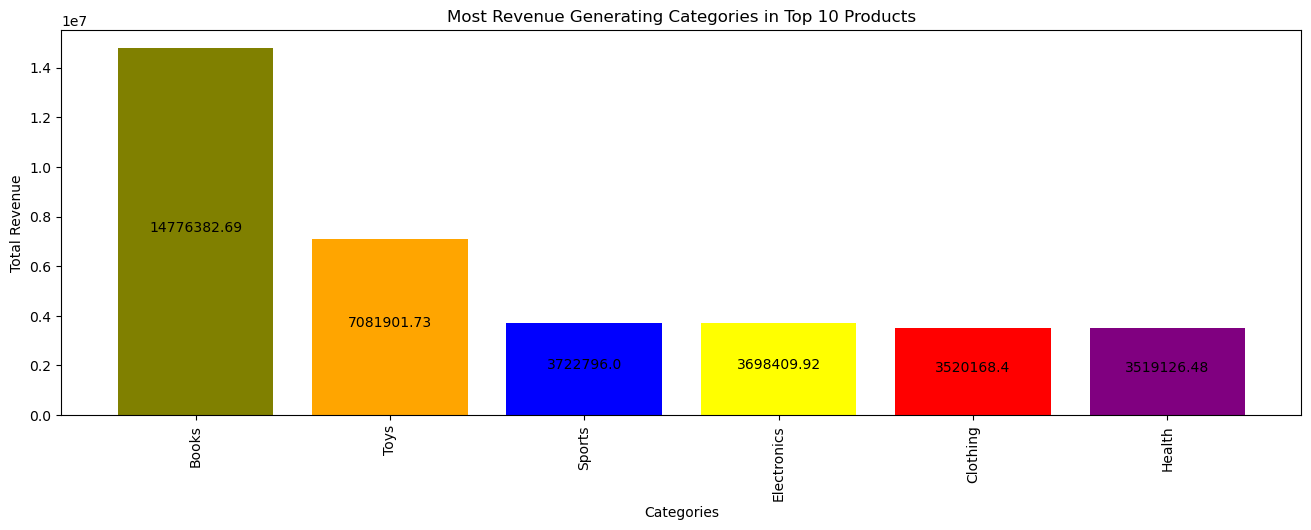

In [46]:
plt.figure(figsize=(16,5))
colors = ['olive','orange','blue','yellow','red','purple']

plt.bar(most_revenue_generating_categories_in_top_10_products.index, most_revenue_generating_categories_in_top_10_products,color=colors)

for i in range(len(most_revenue_generating_categories_in_top_10_products)):
    plt.text(i,most_revenue_generating_categories_in_top_10_products[i]//2, most_revenue_generating_categories_in_top_10_products[i].round(2), ha='center')
    
plt.xlabel("Categories")
plt.ylabel("Total Revenue")
plt.title("Most Revenue Generating Categories in Top 10 Products")
plt.xticks(rotation = 90)
plt.show()

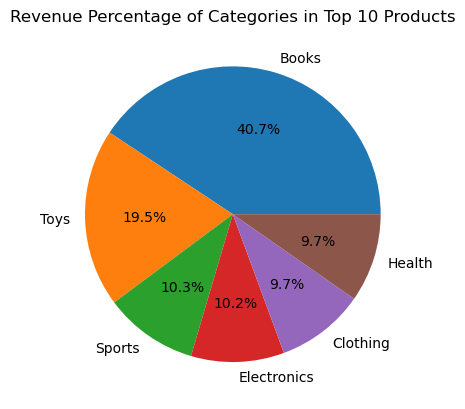

In [47]:
plt.pie(most_revenue_generating_categories_in_top_10_products,autopct='%1.1f%%',labels=most_revenue_generating_categories_in_top_10_products.index)
plt.title("Revenue Percentage of Categories in Top 10 Products")
plt.show()

#### Most Sold categories in Top 10 Products

In [48]:
most_sold_cat_in_top_10_prod = top_10_products.groupby('category')['Total_sales'].sum().sort_values(ascending = False)
most_sold_cat_in_top_10_prod

category
Books          30085
Toys           14432
Electronics     8282
Sports          7920
Clothing        7567
Health          7484
Name: Total_sales, dtype: int64

In [49]:
print("Sum of Total Sales for Top 10 Products :", most_sold_cat_in_top_10_prod.sum())

Sum of Total Sales for Top 10 Products : 75770


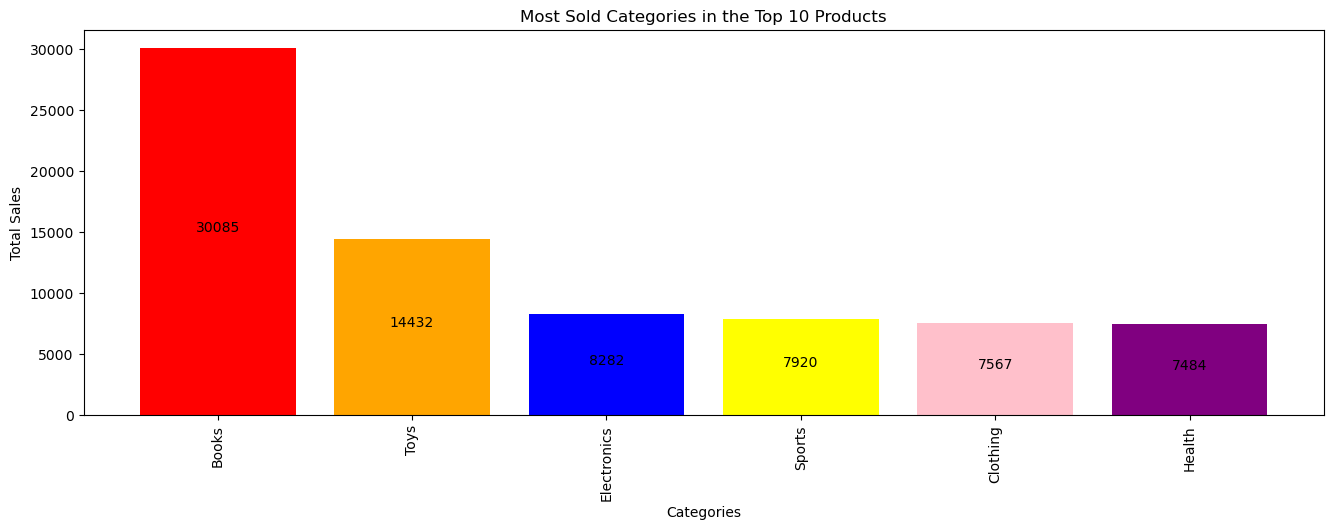

In [50]:
plt.figure(figsize=(16,5))
colors = ['red','orange','blue','yellow','pink','purple']

plt.bar(most_sold_cat_in_top_10_prod.index, most_sold_cat_in_top_10_prod,color=colors)

for i in range(len(most_sold_cat_in_top_10_prod)):
    plt.text(i,most_sold_cat_in_top_10_prod[i]//2, most_sold_cat_in_top_10_prod[i].round(2), ha='center')
    
plt.xlabel("Categories")
plt.ylabel("Total Sales")
plt.title("Most Sold Categories in the Top 10 Products")
plt.xticks(rotation = 90)
plt.show()

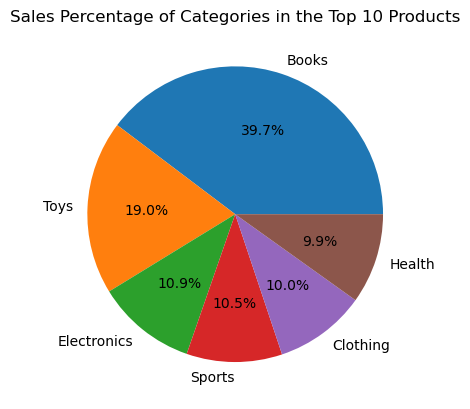

In [51]:
plt.pie(most_sold_cat_in_top_10_prod,autopct='%1.1f%%',labels=most_sold_cat_in_top_10_prod.index)
plt.title("Sales Percentage of Categories in the Top 10 Products")
plt.show()

#### Monthly Sales For Top 10 Products

In [52]:
monthly_sales = top_10_products.loc[:, 'sales_month_1':'sales_month_12'].sum()
monthly_sales.sort_values(ascending=False)

sales_month_4     7854
sales_month_6     7728
sales_month_5     7206
sales_month_3     6829
sales_month_11    6597
sales_month_8     6240
sales_month_2     6008
sales_month_10    5934
sales_month_12    5665
sales_month_9     5395
sales_month_7     5336
sales_month_1     4978
dtype: int64

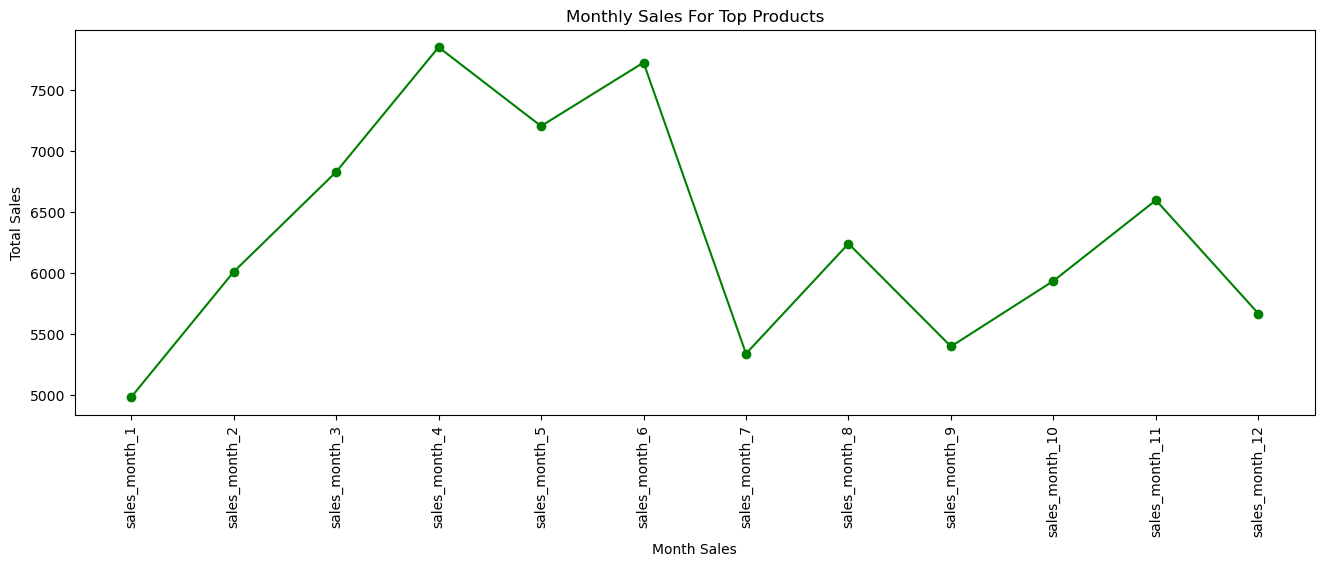

In [53]:
plt.figure(figsize=(16,5))
plt.plot(monthly_sales.index,monthly_sales,marker='o',c = "g")
plt.xlabel('Month Sales')
plt.ylabel('Total Sales')
plt.title('Monthly Sales For Top Products')
plt.xticks(rotation=90)
plt.show()

**`Results From Visualization for Top 10 Products`**
1. The most revenue-generating category in the top 10 products is books, whose revenues throughout the year exceeded 14 million.
2.  Revenues across the top 10 products exceeded 36 million over the course of the year
3. Books are the highest in sales for the top 10 products, with a total of 30,000 book sales out of all sales that exceeded 75,000 for all products.
4. April is the best month in which more than 7,000 products were sold & January is the month with the lowest sales, with 4,900 products sold.

**`Results From Visualization for all Products`**
1. Sales throughout the year amounted to more than 6 million products
2. October is the month with the highest sales, with more than 500,000 products sold Month April was the month with the highest sales for the top 10 revenue-generating products
3. Home and kitchen tools are the least profitable, so the site must be interested in offering offers on these products by selling products with better materials, as well as providing many shapes that suit all decors, increasing the number of its products, and giving offers to increase the sales rate, which is, for example, selling many wallets and Book holders as it is the best selling product
4. 8% of buyers evaluated the products, which is a fairly good percentage, so it is necessary to develop and know customers’ opinions and ratings.
5. Revenues amounted to more than 1 billion throughout the year
6. Books, sports equipment, and children's toys are the ones with the highest sales and profits The least of them are household and kitchen utensils.